In [1]:
%config InlineBackend.figure_formats=['svg']
%matplotlib inline
from matplotlib.pyplot import savefig
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from Bio.motifs.jaspar.db import JASPAR5

In [2]:
data_human_template = pd.read_csv("MADS_ENCODE_datasets.csv", index_col=0,
                  names=["ENCODE_data_set", "TF_name", "JASPAR_id"])

In [3]:
def auc_val(inline):
    return eval(inline.split(' ')[-1])

In [4]:
def read_results(directory, result_file, datasets, template):
    data = template.copy()
    for repo in os.listdir(directory):
        if repo in datasets:
            res_file = '{0}/{1}/{2}'.format(directory, repo, result_file)
            if os.path.isfile(res_file):
                with open(res_file) as stream:
                    first_line = stream.readline()
                    assert first_line.startswith('ROC AUC TFFM+DNAshape')
                    data.loc[repo, 'TFFM_dnashape_AUROC'] = auc_val(first_line)
                    second_line = stream.readline()
                    assert second_line.startswith('PR AUC TFFM+DNAshape')
                    data.loc[repo, 'TFFM_dnashape_AUPRC'] = auc_val(second_line)
                    third_line = stream.readline()
                    assert third_line.startswith('ROC AUC TFFM')
                    data.loc[repo, 'TFFM_AUROC'] = auc_val(third_line)
                    fourth_line = stream.readline()
                    assert fourth_line.startswith('PR AUC TFFM')
                    data.loc[repo, 'TFFM_AUPRC'] = auc_val(fourth_line)
                    fifth_line = stream.readline()
                    assert fifth_line.startswith('ROC AUC PWM+DNAshape')
                    data.loc[repo, 'PSSM_dnashape_AUROC'] = auc_val(fifth_line)
                    sixth_line = stream.readline()
                    assert sixth_line.startswith('PR AUC PWM+DNAshape')
                    data.loc[repo, 'PSSM_dnashape_AUPRC'] = auc_val(sixth_line)
                    seventh_line = stream.readline()
                    assert seventh_line.startswith('ROC AUC PWM')
                    data.loc[repo, 'PSSM_AUROC'] = auc_val(seventh_line)
                    eighth_line = stream.readline()
                    assert eighth_line.startswith('PR AUC PWM')
                    data.loc[repo, 'PSSM_AUPRC'] = auc_val(eighth_line)
                    data.loc[repo, 'TFFM_AUROC_improvement'] = data.loc[repo, 'TFFM_dnashape_AUROC'] - data.loc[repo, 'TFFM_AUROC']
                    data.loc[repo, 'TFFM_AUPRC_improvement'] = data.loc[repo, 'TFFM_dnashape_AUPRC'] - data.loc[repo, 'TFFM_AUPRC']
                    data.loc[repo, 'PSSM_AUROC_improvement'] = data.loc[repo, 'PSSM_dnashape_AUROC'] - data.loc[repo, 'PSSM_AUROC']
                    data.loc[repo, 'PSSM_AUPRC_improvement'] = data.loc[repo, 'PSSM_dnashape_AUPRC'] - data.loc[repo, 'PSSM_AUPRC']
    return data

In [5]:
directory = '20150713_JasparMatchedChipseqScaledDnashape/'
human_datasets = []
for repo in os.listdir(directory):
    if (repo.startswith('wgEncodeAwgTfbs') and
        (repo.find('Srf')>-1 or repo.find('Mef2a')>-1
         or (repo.find('Mef2c')>-1))):
        human_datasets.append(repo)
data_human = read_results(directory, 'predictions_results.txt', human_datasets, data_human_template)

In [6]:
plant_datasets = ['AGL-15', 'AP3', 'FLC', 'PI', 'SEP3', 'SOC1', 'SVP']
data_plant_template = pd.DataFrame(
    index=plant_datasets,
    columns=['TFFM_dnashape_AUROC', 'TFFM_AUROC', 'PSSM_dnashape_AUROC', 'PSSM_AUROC',
             'TFFM_dnashape_AUPRC', 'TFFM_AUPRC', 'PSSM_dnashape_AUPRC', 'PSSM_AUPRC',
            'TF_name'])
data_plant_template['TF_name'] = plant_datasets

In [7]:
directory = '20151217_JasparMatchedPlantsMadsScaledDnashape'
data_plants = read_results(directory, 'predictions_results.txt', plant_datasets, data_plant_template)

In [8]:
combined = pd.concat([data_human.dropna(), data_plants])

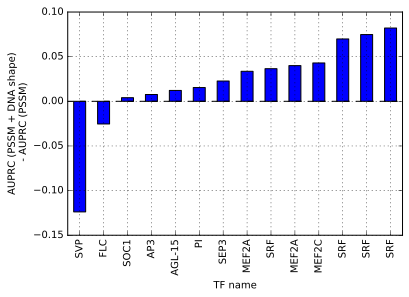

In [9]:
combined.sort('PSSM_AUPRC_improvement', inplace=True)
axes = combined.plot(x='TF_name', y='PSSM_AUPRC_improvement', kind='bar', legend=False)
axes.set_xlabel('TF name')
axes.set_ylabel('AUPRC (PSSM + DNA shape)\n - AUPRC (PSSM)')
#savefig('MADS_PSSM_AUPRC_improvement.svg')

## Analyses of single DNA shape features

In [10]:
human_four = read_results('20150713_JasparMatchedChipseqScaledDnashape',
                        'predictions_results.txt', human_datasets, data_human_template)
human_dir = '20160210_ENCODE_MADS_E2F_DNAshapeIndividual'
human_helt = read_results(human_dir, 'predictions_results_HelT.txt', human_datasets, data_human_template)
human_mgw = read_results(human_dir, 'predictions_results_MGW.txt', human_datasets, data_human_template)
human_prot = read_results(human_dir, 'predictions_results_ProT.txt', human_datasets, data_human_template)
human_roll = read_results(human_dir, 'predictions_results_Roll.txt', human_datasets, data_human_template)

In [11]:
plant_four = read_results('20151217_JasparMatchedPlantsMadsScaledDnashape',
                        'predictions_results.txt', plant_datasets, data_plant_template)
plant_dir = '20160211_PlantsDNAshapeIndividual'
plant_helt = read_results(plant_dir, 'predictions_results_HelT.txt', plant_datasets, data_plant_template)
plant_mgw = read_results(plant_dir, 'predictions_results_MGW.txt', plant_datasets, data_plant_template)
plant_prot = read_results(plant_dir, 'predictions_results_ProT.txt', plant_datasets, data_plant_template)
plant_roll = read_results(plant_dir, 'predictions_results_Roll.txt', plant_datasets, data_plant_template)

In [12]:
combined_four = pd.concat([human_four, plant_four])
combined_helt = pd.concat([human_helt, plant_helt])
combined_mgw = pd.concat([human_mgw, plant_mgw])
combined_prot = pd.concat([human_prot, plant_prot])
combined_roll = pd.concat([human_roll, plant_roll])
tfs = list(combined_four.TF_name)

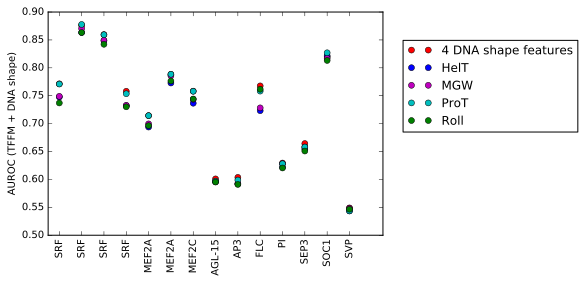

In [13]:
xlimit = xrange(0, len(combined_helt))
axes = plt.plot(xlimit, combined_four.TFFM_dnashape_AUROC, 'ro')
plt.plot(xlimit, combined_helt.TFFM_dnashape_AUROC, 'bo')
plt.plot(xlimit, combined_mgw.TFFM_dnashape_AUROC, 'mo')
plt.plot(xlimit, combined_prot.TFFM_dnashape_AUROC, 'co')
plt.plot(xlimit, combined_roll.TFFM_dnashape_AUROC, 'go')
plt.xticks(xlimit, tfs, rotation='vertical')
plt.legend(['4 DNA shape features', 'HelT', 'MGW', 'ProT', 'Roll'],
          bbox_to_anchor=(1.6, 0.9))
plt.xlim(-.5, len(combined_four) + .5)
plt.ylabel('AUROC (TFFM + DNA shape)')
#plt.savefig('MADS_TFFM_AUROC_DNAshape_individual.svg')

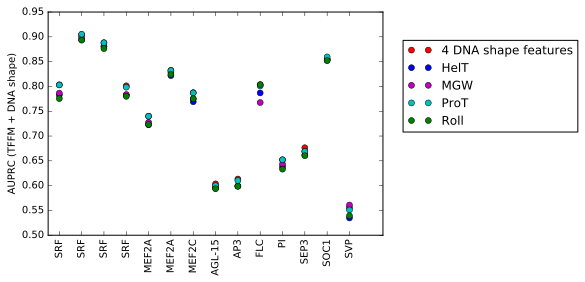

In [14]:
xlimit = xrange(0, len(combined_helt))
axes = plt.plot(xlimit, combined_four.TFFM_dnashape_AUPRC, 'ro')
plt.plot(xlimit, combined_helt.TFFM_dnashape_AUPRC, 'bo')
plt.plot(xlimit, combined_mgw.TFFM_dnashape_AUPRC, 'mo')
plt.plot(xlimit, combined_prot.TFFM_dnashape_AUPRC, 'co')
plt.plot(xlimit, combined_roll.TFFM_dnashape_AUPRC, 'go')
plt.xticks(xlimit, tfs, rotation='vertical')
plt.legend(['4 DNA shape features', 'HelT', 'MGW', 'ProT', 'Roll'],
          bbox_to_anchor=(1.6, 0.9))
plt.xlim(-.5, len(combined_four) + .5)
plt.ylabel('AUPRC (TFFM + DNA shape)')
#plt.savefig('MADS_TFFM_AUPRC_DNAshape_individual.svg')

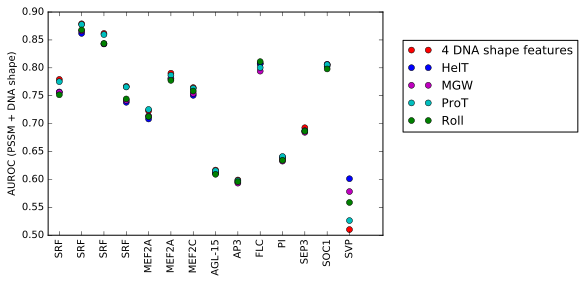

In [15]:
xlimit = xrange(0, len(combined_helt))
axes = plt.plot(xlimit, combined_four.PSSM_dnashape_AUROC, 'ro')
plt.plot(xlimit, combined_helt.PSSM_dnashape_AUROC, 'bo')
plt.plot(xlimit, combined_mgw.PSSM_dnashape_AUROC, 'mo')
plt.plot(xlimit, combined_prot.PSSM_dnashape_AUROC, 'co')
plt.plot(xlimit, combined_roll.PSSM_dnashape_AUROC, 'go')
plt.xticks(xlimit, tfs, rotation='vertical')
plt.legend(['4 DNA shape features', 'HelT', 'MGW', 'ProT', 'Roll'],
          bbox_to_anchor=(1.6, 0.9))
plt.xlim(-.5, len(combined_four) + .5)
plt.ylabel('AUROC (PSSM + DNA shape)')
#plt.savefig('MADS_PSSM_AUROC_DNAshape_individual.svg')

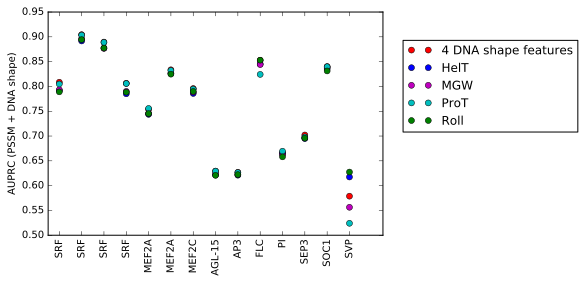

In [16]:
xlimit = xrange(0, len(combined_helt))
axes = plt.plot(xlimit, combined_four.PSSM_dnashape_AUPRC, 'ro')
plt.plot(xlimit, combined_helt.PSSM_dnashape_AUPRC, 'bo')
plt.plot(xlimit, combined_mgw.PSSM_dnashape_AUPRC, 'mo')
plt.plot(xlimit, combined_prot.PSSM_dnashape_AUPRC, 'co')
plt.plot(xlimit, combined_roll.PSSM_dnashape_AUPRC, 'go')
plt.xticks(xlimit, tfs, rotation='vertical')
plt.legend(['4 DNA shape features', 'HelT', 'MGW', 'ProT', 'Roll'],
          bbox_to_anchor=(1.6, 0.9))
plt.xlim(-.5, len(combined_four) + .5)
plt.ylabel('AUPRC (PSSM + DNA shape)')
#plt.savefig('MADS_PSSM_AUPRC_DNAshape_individual.svg')